In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [3]:
def check_NaN(data):
    # Select only numeric columns for spline interpolation
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    print("Number of NaN values:\n", data[numeric_columns].isna().sum())
    
def count_missing_coumns_by_month(df, columns):
    df['Date'] = pd.to_datetime(df['Date'])
    df['YearMonth'] = df ['Date'].dt.to_period('M')
    
    missing_counts = df.groupby('YearMonth')[columns].apply(lambda x: x.isnull().sum())
    
    missing_counts = missing_counts[(missing_counts > 0).any(axis=1)]
    
    print("Number of missing values by month and yr where any column is null:")
    print(missing_counts)
    
def exact_missing_date(df, column):
    if column not in df.columns:
        print(f"Column {column} does not exist in the dataframe.")
        return
    
    null_dates = df[df[column].isna()]["Date"].unique()
    
    if len(null_dates) == 0:
        print(f"No missing dates found in column {column}.")
    else:
        print(f"Missing values for {column} are in the following dates:")
        for date in null_dates:
            print(date)
def print_date_range(data):
    """
    Function to print the earliest and latest dates in the 'Date' column of a DataFrame.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Date' column.
    """
    # Ensure the 'Date' column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop any rows where 'Date' could not be converted to a valid datetime
    data = data.dropna(subset=['Date'])

    # Find the earliest and latest dates
    earliest_date = data['Date'].min()
    latest_date = data['Date'].max()

    # Print the results
    print(f"Earliest Date: {earliest_date}")
    print(f"Latest Date: {latest_date}")
    
def filter_rows_by_date(df, start_date, end_date):
    """
    Filter rows of the DataFrame within the specified date range.

    Parameters:
    df (pd.DataFrame): The input DataFrame with a 'Date' column.
    start_date (str): The start date as a string in 'YYYY-MM-DD' format.
    end_date (str): The end date as a string in 'YYYY-MM-DD' format.

    Returns:
    None: Prints the filtered DataFrame rows.
    """
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert the start and end date strings to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter rows within the date range
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Print the filtered rows
    display(filtered_df)

In [4]:
# Define the date range
# "2024-07-01 00:00" "2024-07-30 23:00"
start_date = "2024-07-01 00:00:00"
end_date = "2024-08-15 23:00:00"


In [5]:
# Load original data
original_data = pd.read_csv("../../DATAFORMODELtrain200824.csv")

# Convert 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date']).dt.round('h')

In [6]:
original_data.head()

,Date,Y,M,Day,H,PriceHU,PriceSK,PriceRO,PriceCZ,PMIHU,GAS,COAL,CO2,COALTOGAS,WDAY,DOFFHU,DOFFSK,DOFFRO,WND,T2MALL,T2MALLMAX,T2MALLMIN,T2MALLAV,T2MALLNONLIN,T2MALLP,T2MALLPCO2,T2MALLPROR,T2MHUNORM,THUDEVNORM,T2MHUPSQ,T2MHUP,T2MHU,PRECHU,WS10MHU,ALLSKY1HU,T2MSKPSQ,T2MSKP,T2MSK,PRECSK,WS10MSK,ALLSKY1SK,T2MROPSQ,T2MROP,T2MRO,PRECRO,WS10MRO,ALLSKY1RO,UNAVNUCHU,UNAVGASHU,UNAVLIGNHU,UNAVTPPHU,UNAVNUCSK,UNAVGASSK,UNAVLIGNSK,UNAVTPPSK,UNAVHYDRSK,UNAVNUCRO,UNAVGASRO,UNAVLIGNRO,UNAVTPPRO,UNAVHYDRRO,UNAVNUCCZ,UNAVGASCZ,UNAVLIGNCZ,UNAVTPPCZ,UNAVNUCBG,UNAVGASBG,UNAVLIGNBG,UNAVTPPBG,UNAVHYDRBG,UNAVNUCSL,UNAVGASSL,UNAVLIGNSL,UNAVTPPSL,UNAVHYDRSL,UNAVNUCFR,UNAVHYDRFR,UNAVNUCALL,UNAVGASALL,UNAVLIGNALL,UNAVTPPALL,UNAVHYDRALL,RORRO,RORSE,RORDE,DEWINDGEN,ROSOLGEN,HUSOLGEN,RHSOLGEN,UA_HU,UA_SK,UA_RO,UA_EU,AT_HU,PL_SK,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,RORRO_HP,RORSE_HP,RORDE_HP,UADEM,HIGHIMIMP,HIGHTEMIMP,SOLMAX,UNAVGASGR,UNAVTPPGR,UNAVHYDRGR,BGSOLGEN,RHBSOLGEN,RORAT_HP,ATWINDGEN,UNAVALLFR,UNAVALL
0,2016-01-01 00:00:00,2016,1,1,1,32.90,16.50,32.90,16.50,49.1,15.3,47.75,7.45,3.120915,1,1,1,1,0,-5.493333,-1.353333,-6.556667,-4.290694,-9.638594,9.506667,70.824667,3403.386667,-1.751667,-5.918333,128.3689,11.33,-7.67,0.0,2.09,0.0,153.7600,12.40,-3.60,0.00,4.42,0.0,249.3241,15.79,-5.21,0.0,5.24,0.0,0.0,25.0,87.0,112.0,125.0,0.0,0.0,0.0,0.0,0,207.0,917.0,1234.0,194,439,0,1219.0,1943.0,0,0,227,227,0,0,0,787,787,0,7210,1524,564.0,232.0,3237.0,4303.0,194.0,358.0,358.0,2135.0,9289.0,0.0,0.0,0.0,445,0,65,510,374.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,330.796471,379.353680,2126.807144,0.0,0.0,-1.972778,562.0,432,432,0,0.0,0.0,2171.643928,6998,8734,4033.0
1,2016-01-01 01:00:00,2016,1,1,2,33.34,15.50,33.34,15.50,49.1,15.3,47.75,7.45,3.120915,1,1,1,1,0,-5.503333,-1.353333,-6.556667,-4.290694,-9.638594,9.496667,70.750167,3124.403333,-1.816667,-6.223333,120.1216,10.96,-8.04,0.0,2.06,0.0,161.5441,12.71,-3.29,0.00,3.69,0.0,250.2724,15.82,-5.18,0.0,5.17,0.0,0.0,168.0,87.0,255.0,125.0,0.0,0.0,0.0,0.0,122,956.0,1378.0,2639.0,194,909,0,1514.0,2238.0,0,0,227,227,0,0,0,787,787,0,7210,1524,1156.0,1124.0,3993.0,6146.0,194.0,329.0,329.0,2173.0,8724.0,0.0,0.0,0.0,445,0,65,510,407.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,357.704351,398.913699,2139.439377,0.0,0.0,-2.074444,562.0,432,432,0,0.0,0.0,2185.977244,6446,8734,6273.0
2,2016-01-01 02:00:00,2016,1,1,3,30.95,14.00,30.95,14.00,49.1,15.3,47.75,7.45,3.120915,1,1,1,1,0,-5.580000,-1.353333,-6.556667,-4.290694,-9.638594,9.420000,70.179000,3023.820000,-1.894167,-6.475833,112.9969,10.63,-8.37,0.0,2.03,0.0,167.4436,12.94,-3.06,0.00,2.86,0.0,246.1761,15.69,-5.31,0.0,4.85,0.0,0.0,168.0,87.0,255.0,125.0,0.0,0.0,0.0,0.0,122,956.0,1378.0,2639.0,194,909,0,1528.0,2252.0,0,0,227,227,0,0,0,787,787,0,7210,1524,1156.0,1124.0,4007.0,6160.0,194.0,321.0,321.0,2176.0,8694.0,0.0,0.0,0.0,445,0,0,445,357.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,384.642458,418.466355,2152.153538,0.0,0.0,-2.158611,562.0,432,432,0,0.0,0.0,2200.296989,6434,8734,6287.0
3,2016-01-01 03:00:00,2016,1,1,4,26.28,10.01,26.28,10.01,49.1,15.3,47.75,7.45,3.120915,1,1,1,1,0,-5.783333,-1.353333,-6.556667,-4.290694,-9.638594,9.216667,68.664167,3142.883333,-1.970833,-6.659167,107.5369,10.37,-8.63,0.0,2.04,0.0,173.7124,13.18,-2.82,0.00,2.14,0.0,228.0100,15.10,-5.90,0.0,4.30,0.0,0.0,168.0,87.0,255.0,125.0,0.0,0.0,0.0,0.0,122,956.0,1378.0,2639.0,194,909,0,1528.0,2252.0,0,0,227,227,0,0,0,787,787,0,7210,1524,1156.0,1124.0,4007.0,6160.0,194.0,341.0,341.0,2180.0,8468.0,0.0,0.0,0.0,445,0,0,445,389.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,411.609123,437.980176,2165.367163,0.0,0.0,-2.219722,562.0,432,432,0,0.0,0.0,2214.584783,6384,8734,6287.0
4

In [7]:
extract_features = pd.read_csv("../Prophet/features_for_Prophet.csv")
only_mi_score = pd.read_csv("../my_mi_scores.csv")

In [8]:
# filter_rows_by_date(extract_features, "2024-06-30 00:00", "2024-07-01 23:00")

In [9]:
print(f"Min Date: {extract_features['Date'].min()}, Max Date: {extract_features['Date'].max()}")

Min Date: 1/1/16 0:00, Max Date: 9/9/24 9:00


In [12]:
# Filter rows where the 'Column Name' does NOT match the specified regex pattern
filtered_mi_scores = only_mi_score[~only_mi_score['Column Name'].str.contains('^(rolling_mean_|lag_|ema_)', regex=True)]

# Display or save the filtered result as needed
print(filtered_mi_scores)

          Column Name  MI Score
10                GAS  0.938765
11               COAL  0.924971
15              PMIHU  0.831400
16                CO2  0.819586
17          UNAVGASRO  0.813586
18          COALTOGAS  0.811770
20          UNAVGASHU  0.756176
21          UNAVTPPBG  0.695435
22         UNAVGASALL  0.693973
23   rolling_std_168h  0.685316
24          UNAVTPPRO  0.658901
26          UNAVTPPHU  0.639044
28          UNAVTPPGR  0.615331
29         UNAVLIGNRO  0.610665
30        UNAVHYDRALL  0.602608
31    rolling_std_24h  0.588706
32          UNAVGASGR  0.564570
33                  Y  0.564475
34         UNAVLIGNBG  0.539079
35             SOLMAX  0.507140
36         UNAVNUCALL  0.504861
37         UNAVHYDRBG  0.482866
38          UNAVNUCFR  0.473941
39          UNAVTPPCZ  0.467144
40         UNAVLIGNCZ  0.465094
41         T2MALLPCO2  0.462241
42          UNAVTPPSL  0.448967
43         UNAVLIGNSL  0.444614
44              UA_HU  0.433270
45        UNAVLIGNALL  0.429204
46      

/var/folders/v9/fvzjlv1s24vc2tkjy7qscjtm0000gn/T/ipykernel_1872/2834073470.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_mi_scores = only_mi_score[~only_mi_score['Column Name'].str.contains('^(rolling_mean_|lag_|ema_)', regex=True)]


In [10]:
# Filter rows where the 'Column Name' matches the specified regex pattern
filtered_mi_scores = only_mi_score[only_mi_score['Column Name'].str.contains('^(rolling_mean_|lag_|ema_)', regex=True)]

# Display or save the filtered result as needed
print(filtered_mi_scores)

          Column Name  MI Score
0     rolling_mean_3h  1.918552
1               lag_1  1.820979
2     rolling_mean_6h  1.240738
3             ema_12h  1.210885
4              lag_24  1.079301
5             ema_24h  1.051266
6             lag_168  0.988982
7    rolling_mean_24h  0.982386
8               lag_3  0.974637
9    rolling_mean_12h  0.966874
12  rolling_mean_168h  0.911672
13           ema_168h  0.896428
14             lag_48  0.838613
19             lag_72  0.787972
25              lag_6  0.642203
27             lag_12  0.637789


/var/folders/v9/fvzjlv1s24vc2tkjy7qscjtm0000gn/T/ipykernel_1872/572905158.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_mi_scores = only_mi_score[only_mi_score['Column Name'].str.contains('^(rolling_mean_|lag_|ema_)', regex=True)]


In [13]:
# only_mi_score

In [14]:
check_NaN(extract_features)

Number of NaN values:
 rolling_mean_3h      13202
lag_1                13201
rolling_mean_6h      13205
ema_12h              13200
lag_24               13224
ema_24h              13200
lag_168              13368
lag_3                13203
rolling_mean_24h     13223
rolling_mean_12h     13211
GAS                      0
COAL                     0
rolling_mean_168h    13367
ema_168h             13200
PMIHU                    0
lag_48               13248
UNAVGASRO                0
COALTOGAS                0
lag_72               13272
CO2                      0
UNAVGASHU                0
UNAVTPPBG                0
rolling_std_168h     13367
UNAVGASALL               0
UNAVTPPRO                0
UNAVLIGNRO               0
lag_12               13212
UNAVHYDRALL              0
lag_6                13206
UNAVTPPHU                0
Y                        0
UNAVTPPGR                0
UNAVLIGNBG               0
rolling_std_24h      13223
UNAVGASGR                0
UNAVHYDRBG               0
UNAVN

In [15]:
len(extract_features)

78912

In [16]:
print_date_range(extract_features)

/var/folders/v9/fvzjlv1s24vc2tkjy7qscjtm0000gn/T/ipykernel_1872/1228721519.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Earliest Date: 2016-01-01 00:00:00
Latest Date: 2024-12-31 23:00:00


In [17]:
extract_features.head()

,rolling_mean_3h,lag_1,rolling_mean_6h,ema_12h,lag_24,ema_24h,lag_168,lag_3,rolling_mean_24h,rolling_mean_12h,GAS,COAL,rolling_mean_168h,ema_168h,PMIHU,lag_48,UNAVGASRO,COALTOGAS,lag_72,CO2,UNAVGASHU,UNAVTPPBG,rolling_std_168h,UNAVGASALL,UNAVTPPRO,UNAVLIGNRO,lag_12,UNAVHYDRALL,lag_6,UNAVTPPHU,Y,UNAVTPPGR,UNAVLIGNBG,rolling_std_24h,UNAVGASGR,UNAVHYDRBG,UNAVNUCALL,SOLMAX,UNAVNUCFR,UNAVTPPCZ,UNAVLIGNCZ,T2MALLPCO2,UNAVLIGNALL,UA_HU,UNAVGASCZ,UNAVTPPSL,UNAVLIGNSL,rolling_std_12h,UA_EU,UNAVHYDRFR,UNAVTPPALL,T2MALLMAX,T2MALLMIN,rolling_std_6h,UNAVGASBG,UNAVALLFR,Date,PriceHU
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,47.75,NaN,NaN,49.1,NaN,207.0,3.120915,NaN,7.45,25.0,227,NaN,232.0,1234.0,917.0,NaN,194.0,NaN,112.0,2016,432,227,NaN,432,0,564.0,562.0,7210,1943.0,1219.0,70.824667,3237.0,445,0,787,787,NaN,510,1524,4303.0,-1.353333,-6.556667,NaN,0,8734,2016-01-01 00:00:00,32.90
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,47.75,NaN,NaN,49.1,NaN,956.0,3.120915,NaN,7.45,168.0,227,NaN,1124.0,2639.0,1378.0,NaN,194.0,NaN,255.0,2016,432,227,NaN,432,0,1156.0,562.0,7210,2238.0,1514.0,70.750167,3993.0,445,0,787,787,NaN,510,1524,6146.0,-1.353333,-6.556667,NaN,0,8734,2016-01-01 01:00:00,33.34
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,47.75,NaN,NaN,49.1,NaN,956.0,3.120915,NaN,7.45,168.0,227,NaN,1124.0,2639.0,1378.0,NaN,194.0,NaN,255.0,2016,432,227,NaN,432,0,1156.0,562.0,7210,2252.0,1528.0,70.179000,4007.0,445,0,787,787,NaN,445,1524,6160.0,-1.353333,-6.556667,NaN,0,8734,2016-01-01 02:00:00,30.95
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,47.75,NaN,NaN,49.1,NaN,956.0,3.120915,NaN,7.45,168.0,227,NaN,1124.0,2639.0,1378.0,NaN,194.0,NaN,255.0,2016,432,227,NaN,432,0,1156.0,562.0,7210,2252.0,1528.0,68.664167,4007.0,445,0,787,787,NaN,445,1524,6160.0,-1.353333,-6.556667,NaN,0,8734,2016-01-01 03:00:00,26.28
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,47.75,NaN,NaN,49.1,NaN,956.0,3.120915,NaN,7.45,168.0,227,NaN,1124.0,2639.0,1378.0,NaN,194.0,NaN,255.0,2016,432,227,NaN,432,0,1156.0,562.0,7935,2252.0,1528.0,66.950667,4007.0,445,0,787,787,NaN,445,1751,6160.0,-1.353333,-6.556667,NaN,0,9686,2016-01-01 04:00:00,24.74


In [18]:
# Filter original data for the specified date range
original_data_filtered = original_data[(original_data['Date'] >= start_date) & (original_data['Date'] <= end_date)]
# original_data_filtered = original_data.copy()

In [19]:
original_data_filtered.head()

,Date,Y,M,Day,H,PriceHU,PriceSK,PriceRO,PriceCZ,PMIHU,GAS,COAL,CO2,COALTOGAS,WDAY,DOFFHU,DOFFSK,DOFFRO,WND,T2MALL,T2MALLMAX,T2MALLMIN,T2MALLAV,T2MALLNONLIN,T2MALLP,T2MALLPCO2,T2MALLPROR,T2MHUNORM,THUDEVNORM,T2MHUPSQ,T2MHUP,T2MHU,PRECHU,WS10MHU,ALLSKY1HU,T2MSKPSQ,T2MSKP,T2MSK,PRECSK,WS10MSK,ALLSKY1SK,T2MROPSQ,T2MROP,T2MRO,PRECRO,WS10MRO,ALLSKY1RO,UNAVNUCHU,UNAVGASHU,UNAVLIGNHU,UNAVTPPHU,UNAVNUCSK,UNAVGASSK,UNAVLIGNSK,UNAVTPPSK,UNAVHYDRSK,UNAVNUCRO,UNAVGASRO,UNAVLIGNRO,UNAVTPPRO,UNAVHYDRRO,UNAVNUCCZ,UNAVGASCZ,UNAVLIGNCZ,UNAVTPPCZ,UNAVNUCBG,UNAVGASBG,UNAVLIGNBG,UNAVTPPBG,UNAVHYDRBG,UNAVNUCSL,UNAVGASSL,UNAVLIGNSL,UNAVTPPSL,UNAVHYDRSL,UNAVNUCFR,UNAVHYDRFR,UNAVNUCALL,UNAVGASALL,UNAVLIGNALL,UNAVTPPALL,UNAVHYDRALL,RORRO,RORSE,RORDE,DEWINDGEN,ROSOLGEN,HUSOLGEN,RHSOLGEN,UA_HU,UA_SK,UA_RO,UA_EU,AT_HU,PL_SK,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,RORRO_HP,RORSE_HP,RORDE_HP,UADEM,HIGHIMIMP,HIGHTEMIMP,SOLMAX,UNAVGASGR,UNAVTPPGR,UNAVHYDRGR,BGSOLGEN,RHBSOLGEN,RORAT_HP,ATWINDGEN,UNAVALLFR,UNAVALL
74496,2024-07-01 00:00:00,2024,7,1,1,97.25,95.74,97.77,94.23,51.8,34.009,108.6,67.83,3.193272,1,0,0,0,0,22.290000,29.653333,19.91,27.870694,38.905298,37.290000,2529.3807,35686.530000,18.052500,5.377500,1800.3049,42.43,23.43,0.01,6.03,-999.0,1396.5169,37.37,21.37,0.00,2.82,-999.0,1855.0249,43.07,22.07,0.0,3.60,-999.0,0.0,943.0,87.0,1030.0,500.0,0.0,0.0,0.0,0.0,610,178.0,681.0,859.0,194,940,1047,3329.0,4564.0,1040,0,1296,1296,908,0,0,0,0,0,21345,3779,3090.0,2168.0,5393.0,7749.0,1102.0,957.0,626.0,1956.0,5954.0,0.0,0.0,0.0,-553,-255,0,-808,2182.0,1824,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1113.880832,1031.740962,1934.273406,0.0,0.0,1.792500,3898.0,811,1067,0,0.0,0.0,4320.645888,1968,25124,10651.0
74497,2024-07-01 01:00:00,2024,7,1,2,88.91,86.25,90.00,83.01,51.8,34.009,108.6,67.83,3.193272,1,0,0,0,0,21.423333,29.653333,19.91,27.854167,38.888771,36.423333,2470.5947,34966.400000,17.409167,4.820833,1699.9129,41.23,22.23,0.00,5.29,-999.0,1363.0864,36.92,20.92,0.00,2.56,-999.0,1774.0944,42.12,21.12,0.0,2.95,-999.0,0.0,848.0,87.0,935.0,500.0,0.0,0.0,0.0,0.0,0,348.0,681.0,1159.0,194,940,1062,2915.0,4538.0,1040,0,1296,1296,908,0,0,0,0,0,21345,3779,2480.0,2258.0,4979.0,7928.0,1102.0,960.0,538.0,1890.0,6077.0,0.0,0.0,0.0,-632,-255,0,-887,2110.0,1884,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1108.932240,1030.444428,1925.925463,0.0,0.0,1.606944,3898.0,1221,1477,0,0.0,0.0,4327.112445,2180,25124,9717.0
74498,2024-07-01 02:00:00,2024,7,1,3,85.60,81.41,86.07,76.59,51.8,34.009,108.6,67.83,3.193272,1,0,0,0,0,20.730000,29.653333,19.91,27.821528,38.856132,35.730000,2423.5659,34407.990000,16.845000,4.225000,1605.6049,40.07,21.07,0.00,4.33,-999.0,1355.7124,36.82,20.82,0.01,3.47,-999.0,1705.6900,41.30,20.30,0.0,2.39,-999.0,0.0,848.0,87.0,935.0,500.0,0.0,0.0,0.0,0.0,0,348.0,681.0,1159.0,194,940,1062,2900.0,4523.0,1040,0,1296,1296,908,0,0,0,0,0,21345,3779,2480.0,2258.0,4964.0,7913.0,1102.0,963.0,435.0,1927.0,5894.0,0.0,0.0,0.0,-628,-255,0,-883,2073.0,1867,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1104.027379,1030.294681,1918.138722,0.0,0.0,1.408333,3898.0,1221,1477,0,0.0,0.0,4331.864929,2552,25124,9702.0
74499,2024-07-01 03:00:00,2024,7,1,4,89.69,82.19,90.00,75.52,51.8,34.009,108.6,67.83,3.193272,1,0,0,0,0,20.166667,29.653333,19.91,27.781528,38.816132,35.166667,2385.3550,33900.666667,16.346667,3.743333,1528.0281,39.09,20.09,0.00,4.02,-999.0,1343.2225,36.65,20.65,0.01,5.14,-999.0,1661.3776,40.76,19.76,0.0,2.01,-999.0,0.0,848.0,87.0,935.0,500.0,0.0,0.0,0.0,0.0,0,348.0,681.0,1159.0,194,940,1062,2901.0,4524.0,1040,0,1066,1066,908,0,0,0,0,0,21345,3779,2480.0,2258.0,4735.0,7684.0,1102.0,964.0,448.0,1895.0,5506.0,1.0,0.0,1.0,-628,-255,0,-883,2042.0,1748,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [23]:
# Load forecasted results
forecasted_data = pd.read_csv("../Prophet/prophet_forecast.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce').dt.round('h')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data.copy()


In [24]:
forecasted_data_filtered.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CO2,CO2_lower,CO2_upper,CO2_ema_12h,CO2_ema_12h_lower,CO2_ema_12h_upper,CO2_ema_168h,CO2_ema_168h_lower,CO2_ema_168h_upper,CO2_ema_24h,CO2_ema_24h_lower,CO2_ema_24h_upper,CO2_lag_1,CO2_lag_1_lower,CO2_lag_1_upper,CO2_lag_12,CO2_lag_12_lower,CO2_lag_12_upper,CO2_lag_168,CO2_lag_168_lower,CO2_lag_168_upper,CO2_lag_24,CO2_lag_24_lower,CO2_lag_24_upper,CO2_lag_3,CO2_lag_3_lower,CO2_lag_3_upper,CO2_lag_48,CO2_lag_48_lower,CO2_lag_48_upper,CO2_lag_6,CO2_lag_6_lower,CO2_lag_6_upper,CO2_lag_72,CO2_lag_72_lower,CO2_lag_72_upper,CO2_rolling_mean_12h,CO2_rolling_mean_12h_lower,CO2_rolling_mean_12h_upper,CO2_rolling_mean_168h,CO2_rolling_mean_168h_lower,CO2_rolling_mean_168h_upper,CO2_rolling_mean_24h,CO2_rolling_mean_24h_lower,CO2_rolling_mean_24h_upper,CO2_rolling_mean_3h,CO2_rolling_mean_3h_lower,CO2_rolling_mean_3h_upper,CO2_rolling_mean_6h,CO2_rolling_mean_6h_lower,CO2_rolling_mean_6h_upper,CO2_rolling_std_168h,CO2_rolling_std_168h_lower,CO2_rolling_std_168h_upper,COAL,COAL_lower,COAL_upper,COALTOGAS,COALTOGAS_lower,COALTOGAS_upper,COALTOGAS_ema_12h,COALTOGAS_ema_12h_lower,COALTOGAS_ema_12h_upper,COALTOGAS_ema_168h,COALTOGAS_ema_168h_lower,COALTOGAS_ema_168h_upper,COALTOGAS_ema_24h,COALTOGAS_ema_24h_lower,COALTOGAS_ema_24h_upper,COALTOGAS_lag_1,COALTOGAS_lag_1_lower,COALTOGAS_lag_1_upper,COALTOGAS_lag_12,COALTOGAS_lag_12_lower,COALTOGAS_lag_12_upper,COALTOGAS_lag_168,COALTOGAS_lag_168_lower,COALTOGAS_lag_168_upper,COALTOGAS_lag_24,COALTOGAS_lag_24_lower,COALTOGAS_lag_24_upper,COALTOGAS_lag_3,COALTOGAS_lag_3_lower,COALTOGAS_lag_3_upper,COALTOGAS_lag_48,COALTOGAS_lag_48_lower,COALTOGAS_lag_48_upper,COALTOGAS_lag_6,COALTOGAS_lag_6_lower,COALTOGAS_lag_6_upper,COALTOGAS_lag_72,COALTOGAS_lag_72_lower,COALTOGAS_lag_72_upper,COALTOGAS_rolling_mean_12h,COALTOGAS_rolling_mean_12h_lower,COALTOGAS_rolling_mean_12h_upper,COALTOGAS_rolling_mean_168h,COALTOGAS_rolling_mean_168h_lower,COALTOGAS_rolling_mean_168h_upper,COALTOGAS_rolling_mean_24h,COALTOGAS_rolling_mean_24h_lower,COALTOGAS_rolling_mean_24h_upper,COALTOGAS_rolling_mean_3h,COALTOGAS_rolling_mean_3h_lower,COALTOGAS_rolling_mean_3h_upper,COALTOGAS_rolling_mean_6h,COALTOGAS_rolling_mean_6h_lower,COALTOGAS_rolling_mean_6h_upper,COAL_ema_12h,COAL_ema_12h_lower,COAL_ema_12h_upper,COAL_ema_168h,COAL_ema_168h_lower,COAL_ema_168h_upper,COAL_ema_24h,COAL_ema_24h_lower,COAL_ema_24h_upper,COAL_lag_1,COAL_lag_1_lower,COAL_lag_1_upper,COAL_lag_12,COAL_lag_12_lower,COAL_lag_12_upper,COAL_lag_168,COAL_lag_168_lower,COAL_lag_168_upper,COAL_lag_24,COAL_lag_24_lower,COAL_lag_24_upper,COAL_lag_3,COAL_lag_3_lower,COAL_lag_3_upper,COAL_lag_48,COAL_lag_48_lower,COAL_lag_48_upper,COAL_lag_6,COAL_lag_6_lower,COAL_lag_6_upper,COAL_lag_72,COAL_lag_72_lower,COAL_lag_72_upper,COAL_rolling_mean_12h,COAL_rolling_mean_12h_lower,COAL_rolling_mean_12h_upper,COAL_rolling_mean_168h,COAL_rolling_mean_168h_lower,COAL_rolling_mean_168h_upper,COAL_rolling_mean_24h,COAL_rolling_mean_24h_lower,COAL_rolling_mean_24h_upper,COAL_rolling_mean_3h,COAL_rolling_mean_3h_lower,COAL_rolling_mean_3h_upper,COAL_rolling_mean_6h,COAL_rolling_mean_6h_lower,COAL_rolling_mean_6h_upper,COAL_rolling_std_168h,COAL_rolling_std_168h_lower,COAL_rolling_std_168h_upper,GAS,GAS_lower,GAS_upper,GAS_ema_12h,GAS_ema_12h_lower,GAS_ema_12h_upper,GAS_ema_168h,GAS_ema_168h_lower,GAS_ema_168h_upper,GAS_ema_24h,GAS_ema_24h_lower,GAS_ema_24h_upper,GAS_lag_1,GAS_lag_1_lower,GAS_lag_1_upper,GAS_lag_12,GAS_lag_12_lower,GAS_lag_12_upper,GAS_lag_168,GAS_lag_168_lower,GAS_lag_168_upper,GAS_lag_24,GAS_lag_24_lower,GAS_lag_24_upper,GAS_lag_3,GAS_lag_3_lower,GAS_lag_3_upper,GAS_lag_48,GAS_lag_48_lower,GAS_lag_48_upper,GAS_lag_6,GAS_lag_6_lower,GAS_lag_6_upper,GAS_lag_72,GAS_lag_72_lower,GAS_lag_72_upper,GAS_rolling_mean_12h,GAS_rolling_mean_12h_lower,GAS_rolling_mean_12h_upper,GAS_rolling_mean_168h,GAS_rolling_mean_168h_lower,GAS_rolling_mean_168h_upper,GAS_rolling_mean_24h,GAS_rolling_mean_24h_lower,GAS_rolling_mean_

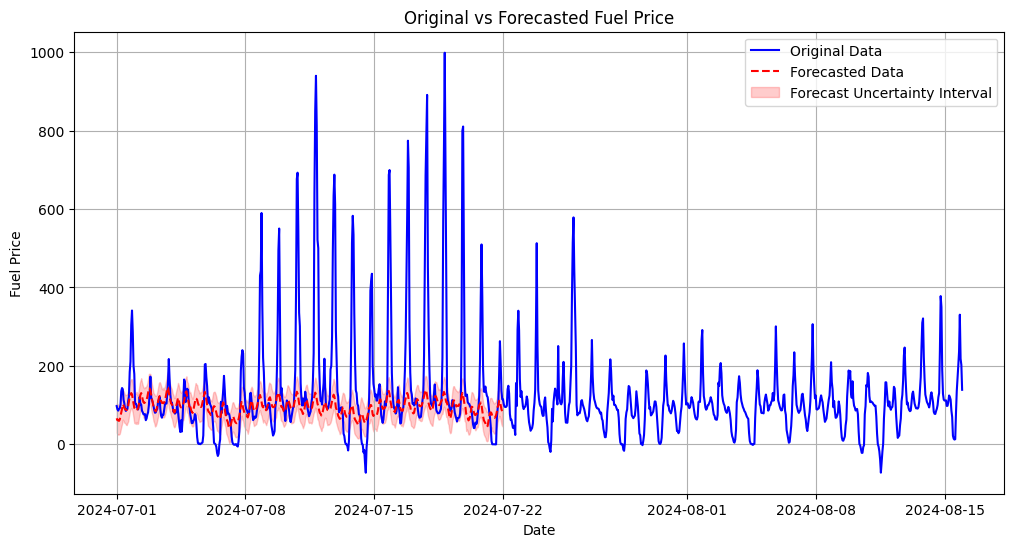

In [25]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceHU'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
if 'yhat_lower' in forecasted_data.columns and 'yhat_upper' in forecasted_data.columns:
    plt.fill_between(forecasted_data_filtered['ds'], 
                     forecasted_data_filtered['yhat_lower'], 
                     forecasted_data_filtered['yhat_upper'], 
                     color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Original vs Forecasted Fuel Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load forecasted results
forecasted_data = pd.read_csv("../NeuralProphet/nProphet_forecast.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce').dt.round('h')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data.copy()


In [ ]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceHU'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
if 'yhat_lower' in forecasted_data.columns and 'yhat_upper' in forecasted_data.columns:
    plt.fill_between(forecasted_data_filtered['ds'], 
                     forecasted_data_filtered['yhat_lower'], 
                     forecasted_data_filtered['yhat_upper'], 
                     color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Original vs Forecasted Fuel Price')
plt.legend()
plt.grid(True)
plt.show()